In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-stock-price/Google_Stock_Price_Test.csv
/kaggle/input/google-stock-price/Google_Stock_Price_Train.csv


In [2]:
df_train = pd.read_csv('/kaggle/input/google-stock-price/Google_Stock_Price_Train.csv')
df_test = pd.read_csv('/kaggle/input/google-stock-price/Google_Stock_Price_Test.csv')

In [3]:
df_train['Open']

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1258, dtype: float64

In [4]:
df_train.shape

(1258, 6)

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()
X_temp=scaler.fit_transform(df_train[['Open']])

In [7]:
X_temp

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [8]:
X_temp.shape

(1258, 1)

In [9]:
X = []
for i in range (0,1198):
    temp = X_temp[i:i+61,0]
    X.append(temp)

In [10]:
X = np.array(X)

In [11]:
X.shape

(1198, 61)

In [12]:
y = X[:,-1]

In [13]:
y

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [14]:
X = X[:,:-1]

In [15]:
X.shape

(1198, 60)

In [16]:
X = X.reshape(-1,60,1)

In [17]:
X.shape

(1198, 60, 1)

In [18]:
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape=(60,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(1))


In [20]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [21]:
hist = model.fit(X,y,epochs =50 ,batch_size = 32)

Epoch 1/50
38/38 [==============================] - 7s 13ms/step - loss: 0.0736
Epoch 2/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0026
Epoch 3/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0023
Epoch 4/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0019
Epoch 5/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0023
Epoch 6/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0021
Epoch 7/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0021
Epoch 8/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0022
Epoch 9/50
38/38 [==============================] - 0s 13ms/step - loss: 0.0027
Epoch 10/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0017
Epoch 11/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0019
Epoch 12/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0014
Epoch 13/50
38/38 [==================

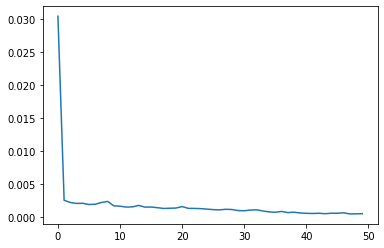

In [22]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])

In [23]:
y_pred = model.predict(X)

In [24]:
y_pred = scaler.inverse_transform(y_pred)

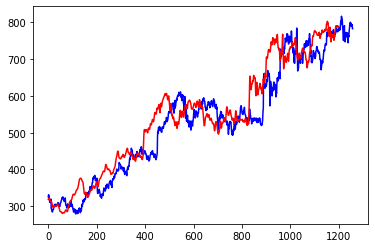

In [26]:
plt.plot(df_train['Open'],c='blue')
plt.plot(y_pred,c='red')

In [28]:
tr = df_train['Open'][60:].reset_index(drop=True)

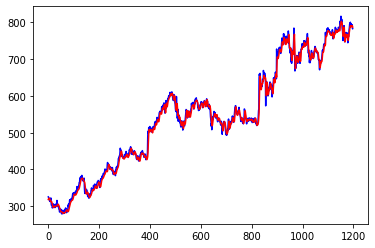

In [29]:
plt.plot(tr,c='blue')
plt.plot(y_pred,c='red')

In [30]:
df_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [51]:
x_test = scaler.transform(df_test[['Open']])

In [52]:
x_test

array([[0.92955205],
       [0.94731751],
       [0.94307612],
       [0.96015329],
       [0.98087655],
       [0.98359253],
       [0.97827219],
       [0.98225314],
       [0.98288563],
       [0.98214153],
       [0.979779  ],
       [0.97849542],
       [0.98182528],
       [0.98245777],
       [1.01045465],
       [1.02407173],
       [1.03930724],
       [1.03354044],
       [0.99624228],
       [0.9631297 ]])

In [53]:
X_temp[-60:]

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [54]:
X_test = np.vstack([X_temp[-60:],x_test])

In [55]:
Xt = []
for i in range (0,20):
    temp = X_test[i:i+61,0]
    Xt.append(temp)

In [57]:
X_test = np.array(Xt)
X_test

array([[0.9299055 , 0.93113327, 0.92750577, ..., 0.93796041, 0.93688146,
        0.92955205],
       [0.93113327, 0.92750577, 0.94415507, ..., 0.93688146, 0.92955205,
        0.94731751],
       [0.92750577, 0.94415507, 0.93876032, ..., 0.92955205, 0.94731751,
        0.94307612],
       ...,
       [0.96054394, 0.9371419 , 0.92841729, ..., 1.02407173, 1.03930724,
        1.03354044],
       [0.9371419 , 0.92841729, 0.90804747, ..., 1.03930724, 1.03354044,
        0.99624228],
       [0.92841729, 0.90804747, 0.8771858 , ..., 1.03354044, 0.99624228,
        0.9631297 ]])

In [58]:
X_test = X_test[:,:-1]

In [59]:
X_test = X_test.reshape(-1,60,1)

In [60]:
y_test_pre = model.predict(X_test)

In [61]:
y_test_pre = scaler.inverse_transform(y_test_pre)

In [62]:
y_test_pre

array([[783.13983],
       [779.74927],
       [782.7499 ],
       [785.0419 ],
       [789.1661 ],
       [796.60803],
       [801.0069 ],
       [799.65344],
       [798.18317],
       [798.2439 ],
       [798.8883 ],
       [799.11035],
       [799.2207 ],
       [800.612  ],
       [802.17487],
       [810.29193],
       [819.51825],
       [826.8984 ],
       [827.41296],
       [815.44244]], dtype=float32)

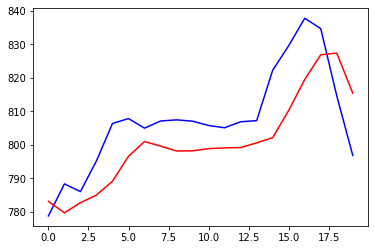

In [63]:
plt.plot(df_test['Open'],c='blue' )
plt.plot(y_test_pre,c='red')